In [2]:
import os
import neat
import Visualize

In [3]:
# The XOR inputs and expected corresponding outputs for fitness evaluation
local_dir = os.path.dirname("__file__")
out_dir = os.path.join(local_dir, 'out')
xor_inputs = [(0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0)]
xor_outputs = [ (0.0,), (1.0,), (1.0,), (0.0,)]

In [4]:
def eval_fitness(net):
    """
    Evaluates fitness of the genome that was used to generate
    provided net
    Arguments:
    net: The feed-forward neural network generated from genome
    Returns:
    The fitness score - the higher score the means
    the better fit organism. Maximal score: 16.0
    """
    error_sum = 0.0
    
    for xi, xo in zip(xor_inputs, xor_outputs):
        output = net.activate(xi)
        error_sum += abs(xo[0] - output[0])
        
    # Calculate amplified fitness
    fitness = (4 - error_sum) ** 2
    return fitness

In [5]:
def eval_genomes(genomes, config):
    """
    The function to evaluate the fitness of each genome in
    the genomes list.
    The provided configuration is used to create feed-forward
    neural network from each genome and after that created
    the neural network evaluated in its ability to solve
    XOR problem. As a result of this function execution, the
    fitness score of each genome updated to the newly
    evaluated one.
    Arguments:
    genomes: The list of genomes from population in the
    current generation
    config: The configuration settings with algorithm
    hyper-parameters
    """
    for genome_id, genome in genomes:
        genome.fitness = 4.0
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        genome.fitness = eval_fitness(net)

In [6]:
def run_experiment(config_file):
    """
    The function to run XOR experiment against hyper-parameters 
    defined in the provided configuration file.
    The winner genome will be rendered as a graph as well as the
    important statistics of neuroevolution process execution.
    Arguments:
        config_file: the path to the file with experiment 
                    configuration
    """
    # Load configuration.
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file)

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    p.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    p.add_reporter(neat.Checkpointer(5, filename_prefix='out/neat-checkpoint-'))

    # Run for up to 300 generations.
    best_genome = p.run(eval_genomes, 300)

    # Display the best genome among generations.
    print('\nBest genome:\n{!s}'.format(best_genome))

    # Show output of the most fit genome against training data.
    print('\nOutput:')
    net = neat.nn.FeedForwardNetwork.create(best_genome, config)
    for xi, xo in zip(xor_inputs, xor_outputs):
        output = net.activate(xi)
        print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))

    # Check if the best genome is an adequate XOR solver
    best_genome_fitness = eval_fitness(net)
    if best_genome_fitness > config.fitness_threshold:
        print("\n\nSUCCESS: The XOR problem solver found!!!")
    else:
        print("\n\nFAILURE: Failed to find XOR problem solver!!!")

    # Visualize the experiment results
    node_names = {-1:'A', -2: 'B', 0:'A XOR B'}
    Visualize.draw_net(config, best_genome, True, node_names=node_names, directory=out_dir)
    Visualize.plot_stats(stats, ylog=False, view=True, filename=os.path.join(out_dir, 'avg_fitness.svg'))
    Visualize.plot_species(stats, view=True, filename=os.path.join(out_dir, 'speciation.svg'))


In [7]:
import shutil
def clean_output():
    if os.path.isdir(out_dir):
        # remove files from previous run
        shutil.rmtree(out_dir)

    # create the output directory
    os.makedirs(out_dir, exist_ok=False)


 ****** Running generation 0 ****** 

Population's average fitness: 4.15313 stdev: 1.24340
Best fitness: 8.49073 - size: (1, 2) - species 1 - id 103
Average adjusted fitness: 0.400
Mean genetic distance 0.977, standard deviation 0.383
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   150      8.5    0.400     0
Total extinctions: 0
Generation time: 0.020 sec

 ****** Running generation 1 ****** 

Population's average fitness: 4.52912 stdev: 1.23430
Best fitness: 8.49073 - size: (1, 2) - species 1 - id 103
Average adjusted fitness: 0.413
Mean genetic distance 1.123, standard deviation 0.434
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   150      8.5    0.413     1
Total extinctions: 0
Generation time: 0.022 sec (0.021 average)

 ****** Running generation 2 ****** 

Population's average fitness: 4.37914 stdev: 

Mean genetic distance 2.060, standard deviation 0.721
Population of 150 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   20    64      9.0    0.481     0
     2    9    43      9.0    0.425     0
     3    5    43      9.0    0.526     1
Total extinctions: 0
Generation time: 0.028 sec (0.027 average)

 ****** Running generation 21 ****** 

Population's average fitness: 5.60323 stdev: 2.32494
Best fitness: 8.99998 - size: (1, 2) - species 3 - id 2940
Average adjusted fitness: 0.480
Mean genetic distance 2.473, standard deviation 0.899
Population of 150 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   21     9      9.0    0.498     0
     2   10    99      9.0    0.438     1
     3    6    42      9.0    0.504     2
Total extinctions: 0
Generation time: 0.029 sec (0.027 average)

 ****** Running generation 22 ****** 

Population's average fitness: 5.85725 st

Mean genetic distance 2.549, standard deviation 1.628
Population of 150 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   38    32      9.0    0.552     0
     2   27    31      9.0    0.501     2
     3   23    40      9.0    0.615     1
     4   14    47      9.0    0.588     1
Total extinctions: 0
Generation time: 0.038 sec (0.039 average)

 ****** Running generation 39 ****** 

Population's average fitness: 5.63790 stdev: 2.29765
Best fitness: 9.00000 - size: (1, 2) - species 3 - id 5622
Average adjusted fitness: 0.318
Mean genetic distance 2.625, standard deviation 1.619
Population of 151 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   39    31      9.0    0.183     1
     2   28    44      9.0    0.290     3
     3   24    30      9.0    0.451     0
     4   15    46      9.0    0.348     2
Total extinctions: 0
Generation time: 0.044 sec (0.040 avera

Mean genetic distance 2.809, standard deviation 1.465
Population of 151 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   53    22      9.0    0.639     1
     2   42    26      9.0    0.538     4
     3   38    38      9.0    0.509    10
     4   29    18      9.0    0.477    13
     5   13    37      8.6    0.439     3
     6    7    10      9.0    0.554     1
Total extinctions: 0
Generation time: 0.042 sec (0.040 average)

 ****** Running generation 54 ****** 

Population's average fitness: 5.71349 stdev: 2.41170
Best fitness: 9.00000 - size: (1, 2) - species 1 - id 7591
Average adjusted fitness: 0.594
Mean genetic distance 2.684, standard deviation 1.337
Population of 151 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   54    23      9.0    0.602     2
     2   43    32      9.0    0.668     5
     3   39    22      9.0    0.600    11
     4   30    12 

Mean genetic distance 3.548, standard deviation 1.823
Population of 150 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   66     8      9.0    0.617     2
     2   55    25      9.0    0.500    17
     5   26    19      9.0    0.583     6
     6   20    43      9.0    0.741     6
     7    5    35      9.0    0.598     0
     8    2    20      9.0    0.402     0
Total extinctions: 0
Generation time: 0.045 sec (0.048 average)

 ****** Running generation 67 ****** 

Population's average fitness: 6.08735 stdev: 2.47345
Best fitness: 9.00000 - size: (2, 5) - species 5 - id 8709
Average adjusted fitness: 0.590
Mean genetic distance 3.454, standard deviation 1.808
Population of 151 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   67     6      4.1    0.376     3
     2   56    25      9.0    0.602    18
     5   27    24      9.0    0.655     7
     6   21    36 


 ****** Running generation 80 ****** 

Population's average fitness: 6.16868 stdev: 2.62841
Best fitness: 9.00000 - size: (2, 5) - species 5 - id 10241
Average adjusted fitness: 0.639
Mean genetic distance 2.587, standard deviation 1.337
Population of 150 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   80    22      9.0    0.737     4
     5   40    36      9.0    0.548    20
     6   34    44      9.0    0.722     0
     7   19    16      9.0    0.736     1
     8   16    32      9.0    0.453     5
Total extinctions: 0
Generation time: 0.050 sec (0.056 average)

 ****** Running generation 81 ****** 

Population's average fitness: 5.82799 stdev: 2.50901
Best fitness: 9.00000 - size: (2, 5) - species 5 - id 11594
Average adjusted fitness: 0.602
Mean genetic distance 2.591, standard deviation 1.339
Population of 149 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====



 ****** Running generation 95 ****** 

Population's average fitness: 6.62553 stdev: 2.52215
Best fitness: 9.00000 - size: (1, 2) - species 1 - id 11777
Average adjusted fitness: 0.720
Mean genetic distance 2.021, standard deviation 1.016
Population of 149 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   95    22      9.0    0.757    19
     6   49    49      9.0    0.708     5
     7   34    33      9.0    0.853    16
     8   31    45      9.0    0.563     1
Total extinctions: 0
Generation time: 0.076 sec (0.072 average)

 ****** Running generation 96 ****** 

Population's average fitness: 6.64936 stdev: 2.45687
Best fitness: 9.00000 - size: (1, 2) - species 1 - id 11777

Species 1 with 22 members is stagnated: removing it
Average adjusted fitness: 0.559
Mean genetic distance 2.105, standard deviation 0.938
Population of 150 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  ===

Mean genetic distance 2.111, standard deviation 0.681
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6   65    59      9.0    0.722    21
     8   47    91      9.0    0.659    17
Total extinctions: 0
Generation time: 0.074 sec (0.076 average)

 ****** Running generation 112 ****** 

Population's average fitness: 6.89924 stdev: 2.48190
Best fitness: 9.00000 - size: (8, 12) - species 8 - id 15361
Average adjusted fitness: 0.733
Mean genetic distance 2.111, standard deviation 0.458
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6   66    41      9.0    0.727    22
     8   48   109      9.0    0.740    18
Total extinctions: 0
Generation time: 0.062 sec (0.076 average)

 ****** Running generation 113 ****** 

Population's average fitness: 6.77564 stdev: 2.49665
Best fitness: 9.00000 - size: (8, 12) - species 8 - id 15361
Averag

Population's average fitness: 7.03514 stdev: 2.44891
Best fitness: 9.00000 - size: (9, 7) - species 8 - id 17920
Average adjusted fitness: 0.628
Mean genetic distance 3.102, standard deviation 0.911
Population of 150 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6   83    55      9.0    0.726    39
     8   65    67      9.0    0.782    35
     9    1    25      4.0    0.375     0
    10    0     3       --       --     0
Total extinctions: 0
Generation time: 0.054 sec (0.060 average)
Saving checkpoint to out/neat-checkpoint-129

 ****** Running generation 130 ****** 

Population's average fitness: 6.86953 stdev: 2.48686
Best fitness: 9.00000 - size: (9, 7) - species 8 - id 17920
Average adjusted fitness: 0.596
Mean genetic distance 3.327, standard deviation 1.049
Population of 150 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6   84    60      9.0    0.759 

Mean genetic distance 2.634, standard deviation 0.799
Population of 151 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6   98    35      9.0    0.808    54
     9   16    38      9.0    0.811     2
    10   15    39      9.0    0.816     9
    11   10    39      9.0    0.812     8
Total extinctions: 0
Generation time: 0.085 sec (0.073 average)
Saving checkpoint to out/neat-checkpoint-144

 ****** Running generation 145 ****** 

Population's average fitness: 6.95012 stdev: 2.49092
Best fitness: 9.00000 - size: (8, 5) - species 10 - id 20736
Average adjusted fitness: 0.744
Mean genetic distance 2.656, standard deviation 0.752
Population of 150 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6   99    36      9.0    0.778    55
     9   17    36      9.0    0.754     3
    10   16    40      9.0    0.779    10
    11   11    38      9.0    0.667     9
Total extinc

Population's average fitness: 7.29048 stdev: 2.42876
Best fitness: 9.00000 - size: (9, 11) - species 9 - id 20992
Average adjusted fitness: 0.789
Mean genetic distance 2.541, standard deviation 0.836
Population of 151 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  113    48      9.0    0.840    69
     9   31    51      9.0    0.791    17
    11   25    52      9.0    0.735    23
Total extinctions: 0
Generation time: 0.061 sec (0.066 average)
Saving checkpoint to out/neat-checkpoint-159

 ****** Running generation 160 ****** 

Population's average fitness: 7.52774 stdev: 2.23178
Best fitness: 9.00000 - size: (9, 11) - species 9 - id 20992
Average adjusted fitness: 0.707
Mean genetic distance 2.564, standard deviation 0.824
Population of 150 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  114    44      9.0    0.669    70
     9   32    52      9.0    0.74


 ****** Running generation 175 ****** 

Population's average fitness: 7.67488 stdev: 2.30590
Best fitness: 9.00000 - size: (9, 10) - species 13 - id 24576
Average adjusted fitness: 0.828
Mean genetic distance 3.002, standard deviation 0.908
Population of 150 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  129    76      9.0    0.933    85
    12   11     7      9.0    0.720     9
    13    8    67      9.0    0.831     5
Total extinctions: 0
Generation time: 0.058 sec (0.063 average)

 ****** Running generation 176 ****** 

Population's average fitness: 7.09611 stdev: 2.49413
Best fitness: 9.00000 - size: (9, 10) - species 13 - id 24576
Average adjusted fitness: 0.643
Mean genetic distance 3.062, standard deviation 1.025
Population of 150 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  130    86      9.0    0.825    86
    12   12    20      4.0    0.374 

Population's average fitness: 6.95312 stdev: 2.45944
Best fitness: 9.00000 - size: (9, 10) - species 13 - id 24576
Average adjusted fitness: 0.741
Mean genetic distance 2.461, standard deviation 0.741
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  146    72      9.0    0.710   102
    13   25    78      9.0    0.772    22
Total extinctions: 0
Generation time: 0.051 sec (0.054 average)

 ****** Running generation 193 ****** 

Population's average fitness: 7.31764 stdev: 2.39277
Best fitness: 9.00000 - size: (9, 10) - species 13 - id 24576
Average adjusted fitness: 0.786
Mean genetic distance 2.499, standard deviation 0.747
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  147    74      9.0    0.773   103
    13   26    76      9.0    0.798    23
Total extinctions: 0
Generation time: 0.048 sec (0.054 average)

 ****** Runn


 ****** Running generation 210 ****** 

Population's average fitness: 7.22415 stdev: 2.36279
Best fitness: 9.00000 - size: (9, 10) - species 13 - id 24576
Average adjusted fitness: 0.643
Mean genetic distance 2.325, standard deviation 0.688
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  164    68      9.0    0.608   120
    13   43    82      9.0    0.677    40
Total extinctions: 0
Generation time: 0.045 sec (0.053 average)

 ****** Running generation 211 ****** 

Population's average fitness: 7.28661 stdev: 2.34894
Best fitness: 9.00000 - size: (9, 10) - species 13 - id 24576
Average adjusted fitness: 0.673
Mean genetic distance 2.406, standard deviation 0.720
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  165    66      9.0    0.657   121
    13   44    84      9.0    0.689    41
Total extinctions: 0
Generation time

Mean genetic distance 2.441, standard deviation 0.758
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  182    76      9.0    0.679   138
    13   61    74      9.0    0.660    58
Total extinctions: 0
Generation time: 0.050 sec (0.057 average)

 ****** Running generation 229 ****** 

Population's average fitness: 7.11526 stdev: 2.39532
Best fitness: 9.00000 - size: (9, 10) - species 13 - id 24576
Average adjusted fitness: 0.628
Mean genetic distance 2.332, standard deviation 0.785
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  183    72      9.0    0.572   139
    13   62    78      9.0    0.685    59
Total extinctions: 0
Generation time: 0.051 sec (0.056 average)
Saving checkpoint to out/neat-checkpoint-229

 ****** Running generation 230 ****** 

Population's average fitness: 7.40129 stdev: 2.34047
Best fitness: 9.00000

Mean genetic distance 3.124, standard deviation 1.125
Population of 151 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    13   77    70      9.0    0.618    74
    14    3    62      9.0    0.613     2
    15    3    19      4.1    0.003     0
Total extinctions: 0
Generation time: 0.061 sec (0.054 average)
Saving checkpoint to out/neat-checkpoint-244

 ****** Running generation 245 ****** 

Population's average fitness: 6.98645 stdev: 2.43950
Best fitness: 9.00000 - size: (9, 10) - species 13 - id 24576
Average adjusted fitness: 0.570
Mean genetic distance 3.246, standard deviation 1.147
Population of 150 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    13   78    69      9.0    0.765    75
    14    4    58      9.0    0.698     3
    15    4    23      8.5    0.249     0
Total extinctions: 0
Generation time: 0.052 sec (0.054 average)

 ****** Running generation 246

Mean genetic distance 3.361, standard deviation 1.199
Population of 149 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    13   92    49      9.0    0.694    89
    14   18    46      9.0    0.733    17
    15   18    47      9.0    0.748     0
    16    0     7       --       --     0
Total extinctions: 0
Generation time: 0.070 sec (0.059 average)
Saving checkpoint to out/neat-checkpoint-259

 ****** Running generation 260 ****** 

Population's average fitness: 7.08896 stdev: 2.47249
Best fitness: 9.00000 - size: (10, 11) - species 13 - id 37392
Average adjusted fitness: 0.676
Mean genetic distance 3.554, standard deviation 1.243
Population of 149 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    13   93    47      9.0    0.755    90
    14   19    43      9.0    0.808    18
    15   19    57      9.0    0.773     0
    16    1     2      4.0    0.370     0
Total exti

Mean genetic distance 3.395, standard deviation 1.414
Population of 152 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    13  107    33      9.0    0.757   104
    14   33    33      9.0    0.679    32
    15   33    32      9.0    0.667     1
    16   15    27      9.0    0.542     0
    17   13    27      9.0    0.655     0
Total extinctions: 0
Generation time: 0.077 sec (0.081 average)
Saving checkpoint to out/neat-checkpoint-274

 ****** Running generation 275 ****** 

Population's average fitness: 7.03091 stdev: 2.45521
Best fitness: 9.00000 - size: (9, 10) - species 13 - id 24576
Average adjusted fitness: 0.753
Mean genetic distance 3.377, standard deviation 1.397
Population of 152 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    13  108    32      9.0    0.761   105
    14   34    31      9.0    0.713    33
    15   34    46      9.0    0.815     0
    16   16

Mean genetic distance 3.107, standard deviation 1.108
Population of 151 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    14   48    34      9.0    0.543    47
    15   48    35      9.0    0.660    13
    16   30    34      9.0    0.473     1
    17   28    48      9.0    0.707    12
Total extinctions: 0
Generation time: 0.066 sec (0.087 average)
Saving checkpoint to out/neat-checkpoint-289

 ****** Running generation 290 ****** 

Population's average fitness: 7.14207 stdev: 2.37890
Best fitness: 9.00000 - size: (7, 7) - species 14 - id 35584
Average adjusted fitness: 0.631
Mean genetic distance 3.175, standard deviation 1.077
Population of 150 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    14   49    37      9.0    0.676    48
    15   49    33      9.0    0.683    14
    16   31    34      9.0    0.554     2
    17   29    46      9.0    0.609    13
Total extinc

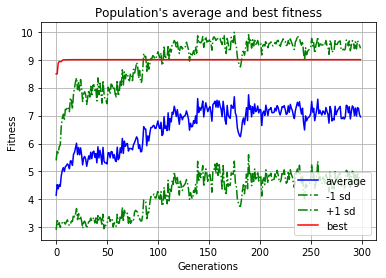

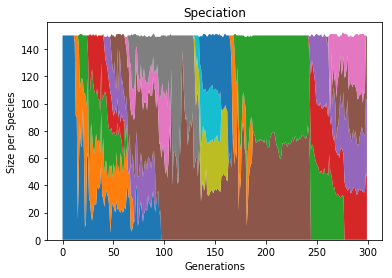

In [19]:
config_path = os.path.join(local_dir, 'xor_config.ini')
clean_output()
run_experiment(config_path)